In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('//content//hospital_readmissions - hospital_readmissions.csv')
data.shape

(25000, 17)

In [ ]:
data.head()


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [ ]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [ ]:
print(data.isnull().sum())


age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64


In [ ]:

data.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


<Axes: >

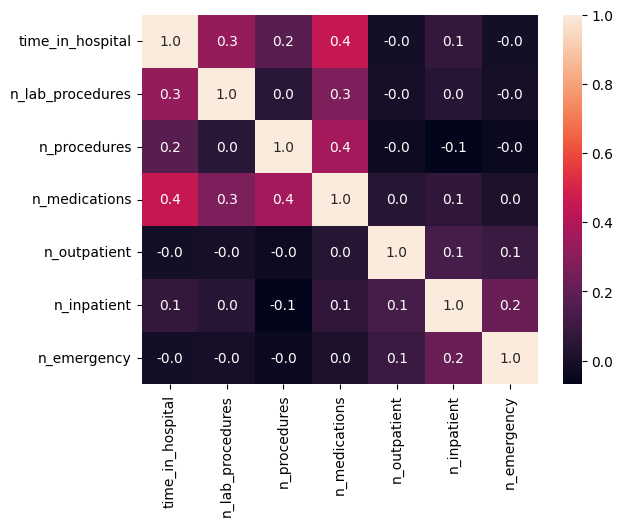

In [ ]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr,annot = True,fmt = ".1f")

In [ ]:
data['age'].value_counts()

,count
age,
[70-80),6837
[60-70),5913
[80-90),4516
[50-60),4452
[40-50),2532
[90-100),750


In [ ]:
age_map = {
    "[40-50)": 1,
    "[50-60)": 2,
    "[60-70)": 3,
    "[70-80)": 4,
    "[80-90)": 5,
    "[90-100)": 6
}

In [ ]:
data['bin_age'] = data['age'].map(age_map)
data.drop(columns=['age'],inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['medical_specialty'] = le.fit_transform(data['medical_specialty'])
data['diag_1'] = le.fit_transform(data['diag_1'])
data['diag_2'] = le.fit_transform(data['diag_2'])
data['diag_3'] = le.fit_transform(data['diag_3'])
data['glucose_test'] = le.fit_transform(data['glucose_test'])
data['A1Ctest'] = le.fit_transform(data['A1Ctest'])
data['change'] = le.fit_transform(data['change'])
data['diabetes_med'] = le.fit_transform(data['diabetes_med'])
data['readmitted'] = le.fit_transform(data['readmitted'])

<Axes: >

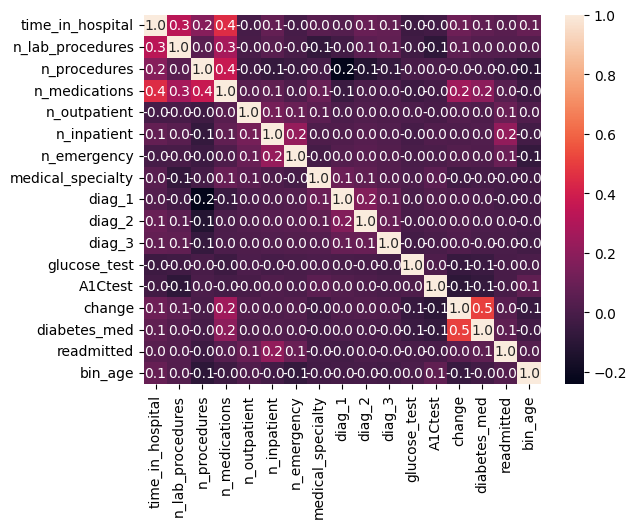

In [ ]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr,annot = True,fmt = ".1f")

In [ ]:
cols = [col for col in data.columns]

In [ ]:
cols.remove("bin_age")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()

for col in cols:
    data[col] = ss.fit_transform(data[[col]])

In [ ]:
data.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,bin_age
0,0.538462,0.633929,0.166667,0.217949,0.060606,0.0,0.0,0.666667,0.000000,1.000000,0.857143,0.5,0.5,0.0,1.0,0.0,4
1,0.153846,0.294643,0.333333,0.153846,0.000000,0.0,0.0,0.833333,0.857143,0.857143,0.857143,0.5,0.5,0.0,1.0,0.0,4
2,0.307692,0.392857,0.000000,0.217949,0.000000,0.0,0.0,0.666667,0.000000,0.000000,0.000000,0.5,0.5,1.0,1.0,1.0,2
3,0.076923,0.312500,0.000000,0.141026,0.030303,0.0,0.0,0.666667,0.000000,0.857143,0.142857,0.5,0.5,1.0,1.0,1.0,4
4,0.000000,0.366071,0.000000,0.076923,0.000000,0.0,0.0,0.500000,0.857143,0.000000,1.000000,0.5,0.5,0.0,1.0,0.0,3


In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['readmitted'])
y = data['readmitted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='saga', max_iter=100, random_state=27, warm_start=True)

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=27, solver='saga', warm_start=True)

In [ ]:
train_pred=lr.predict(X_train)
train_acc=accuracy_score(train_pred,y_train)
print('Training Accuracy is',train_acc*100)

Training Accuracy is 60.44500000000001


In [ ]:
test_pred=lr.predict(X_test)
test_acc=accuracy_score(test_pred,y_test)
print('Testing Accuracy is',test_acc*100)

Testing Accuracy is 61.199999999999996


<Axes: >

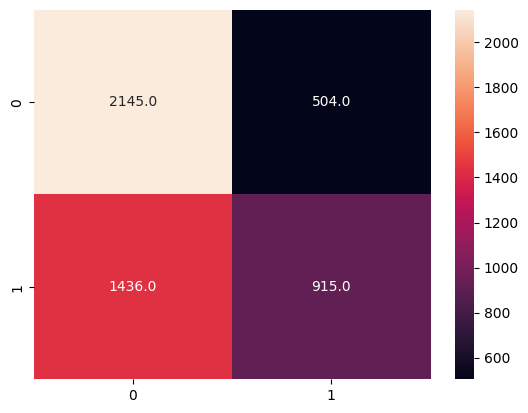

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve,recall_score,roc_curve, auc
cm = confusion_matrix(y_test,test_pred)
sns.heatmap(cm, annot=True,fmt=".1f")

In [ ]:
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)

print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.6448202959830867
Recall:  0.38919608677158657


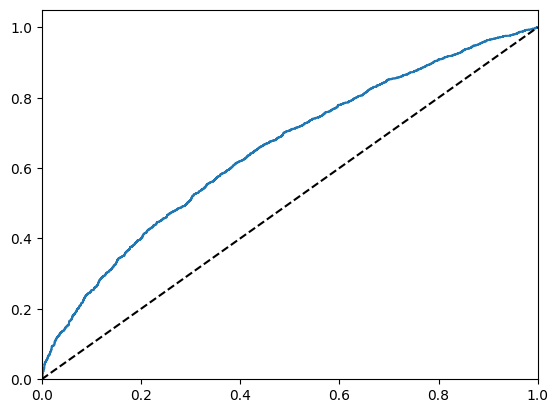

In [ ]:
y_pred_proba = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

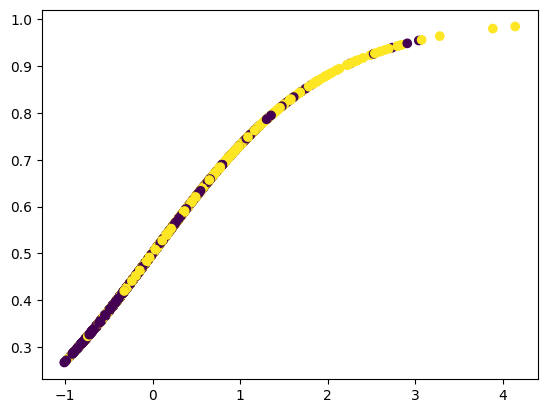

In [ ]:
co= lr.coef_[0]
inter = lr.intercept_[0]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

lc = np.dot(X_test, co) + inter
pred_pob = sigmoid(lc)

plt.scatter(lc, pred_pob, c=y_test)

In [ ]:
reg = pd.DataFrame()
reg.insert(0,column="ybar",value=test_pred[0])
reg.insert(1,column="y",value=y_test)

In [ ]:
reg

,ybar,y
1245,NaN,0.0
8108,NaN,0.0
17510,NaN,1.0
13333,NaN,1.0
1534,NaN,1.0
...,...,...
7423,NaN,1.0
8955,NaN,0.0
15879,NaN,0.0
6145,NaN,1.0


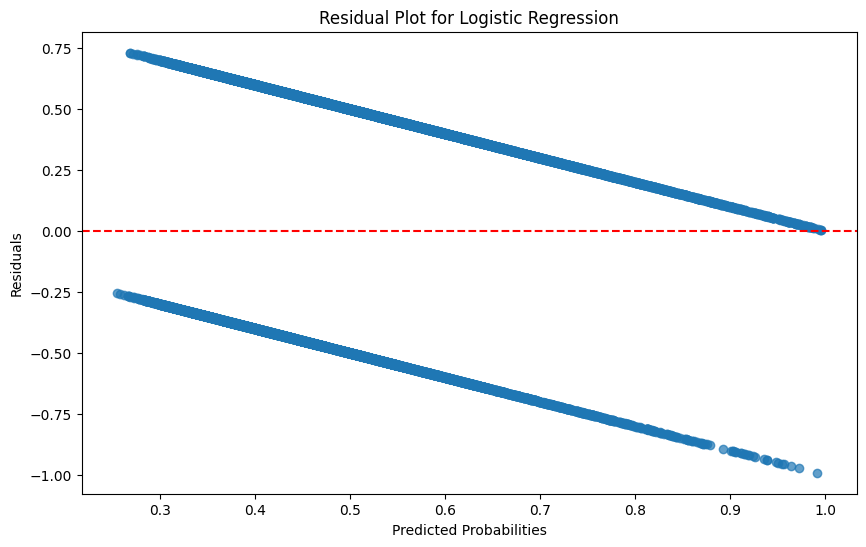

In [ ]:
pred_probs = lr.predict_proba(X)[:, 1]

# Calculate residuals (observed - predicted)
residuals = y - pred_probs

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(pred_probs, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Residuals')
plt.title('Residual Plot for Logistic Regression')
plt.show()

In [ ]:
X_train = X_train.astype(int)
y_train = y_train.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


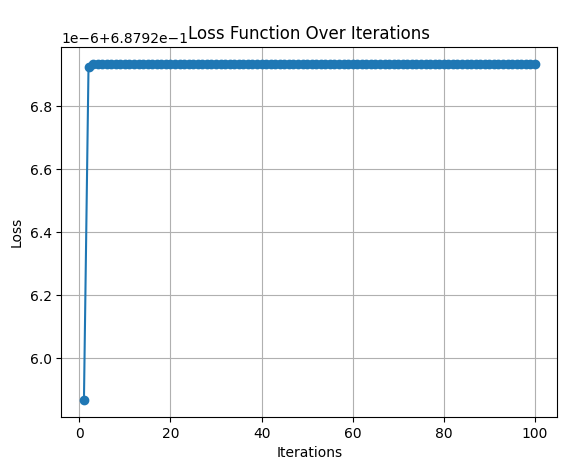

Predictions: [0 0 1 ... 0 1 0]
Actual Labels (y_test): 1245     0.0
8108     0.0
17510    1.0
13333    1.0
1534     1.0
        ... 
7423     1.0
8955     0.0
15879    0.0
6145     1.0
21070    1.0
Name: readmitted, Length: 5000, dtype: float64


In [ ]:
iterations = []
loss_values = []

for i in range(lr.max_iter):
    lr.fit(X_train, y_train)
    iterations.append(i + 1)

    # Calculate the loss using the log loss (cross-entropy) function
    probas = lr.predict_proba(X_train)
    loss = -np.mean(np.log(np.choose(y_train, probas.T)))
    loss_values.append(loss)

# Create a plot of the loss function
plt.figure()
plt.plot(iterations, loss_values, marker='o', linestyle='-')
plt.title('Loss Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Make predictions on the test data
predictions = lr.predict(X_test)

# Compare the predictions to the actual labels (y_test)
print("Predictions:", predictions)
print("Actual Labels (y_test):", y_test)

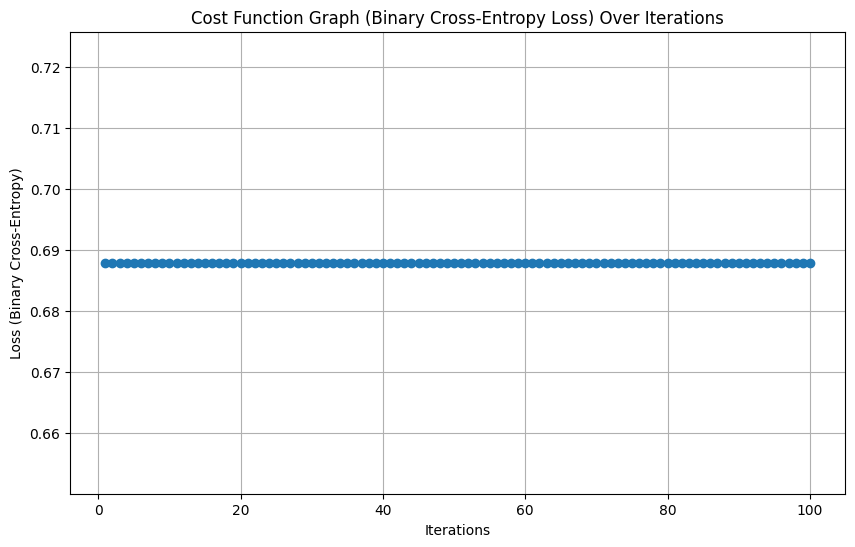

In [ ]:

from sklearn.metrics import log_loss

# Initialize lists to store iteration numbers and corresponding loss values
iterations = []
loss_values = []

# Retrain the model while recording the loss at each iteration
for i in range(1, lr.max_iter + 1):
    lr.fit(X_train, y_train)
    iterations.append(i)

    # Predict probabilities on training data
    probas = lr.predict_proba(X_train)

    # Calculate binary cross-entropy loss (log loss)
    loss = log_loss(y_train, probas)
    loss_values.append(loss)

# Plot the loss function
plt.figure(figsize=(10, 6))
plt.plot(iterations, loss_values, marker='o', linestyle='-')
plt.title('Cost Function Graph (Binary Cross-Entropy Loss) Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.grid(True)
plt.show()


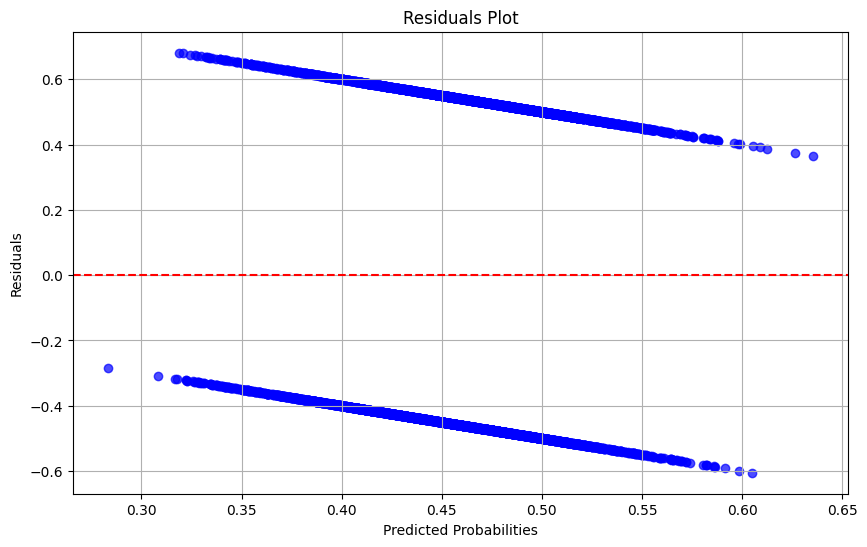

In [ ]:


# Predict probabilities on the test data
pred_probs = lr.predict_proba(X_test)[:, 1]

# Calculate residuals (observed - predicted probabilities)
residuals = y_test - pred_probs

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(pred_probs, residuals, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()


Model Coefficients:
time_in_hospital    -0.072675
n_lab_procedures     0.405536
n_procedures        -0.126759
n_medications       -0.358742
n_outpatient         0.406518
n_inpatient          0.744396
n_emergency          0.513284
medical_specialty   -0.237036
diag_1               0.036615
diag_2               0.068960
diag_3               0.074874
glucose_test         0.076660
A1Ctest             -0.231897
change               0.077560
diabetes_med         0.256999
bin_age              0.037564
dtype: float64


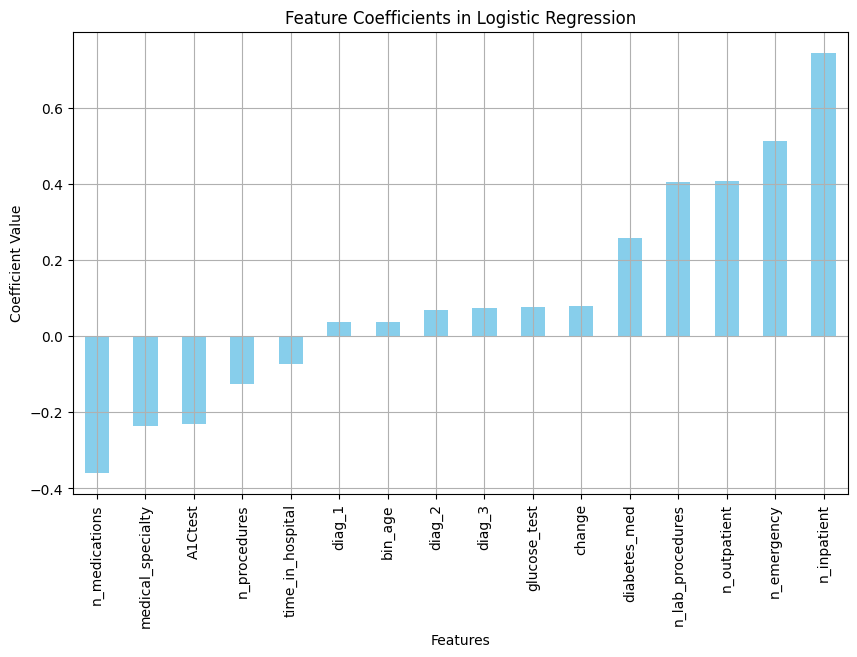

In [ ]:
# Interpret the coefficients of the logistic regression model
coefficients = pd.Series(lr.coef_[0], index=X_train.columns)
print("Model Coefficients:")
print(coefficients)

# Visualize the coefficients
coefficients_sorted = coefficients.sort_values()

plt.figure(figsize=(10, 6))
coefficients_sorted.plot(kind='bar', color='skyblue')
plt.title('Feature Coefficients in Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()
